In [1]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from IPython.display import clear_output

import pandas as pd
import numpy as np
classes = {0:'T-shirt/top',
           1:'Trouser', 
           2: 'Pullover', 
           3: 'Dress', 
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag', 
           9: 'Ankle Boot'}

In [2]:
selected_labels = [0, 1, 5, 8, 9]

data = pd.read_csv('/home/mohammadseyfi/Desktop/deeplearning/PCA_MNIST/fashion-mnist_train.csv')
data = data.loc[data['label'].isin(selected_labels)].reset_index(drop=True)

labels = data.pop('label')
index = 0
data = data.values
images = np.reshape(data, (-1, 28, 28))

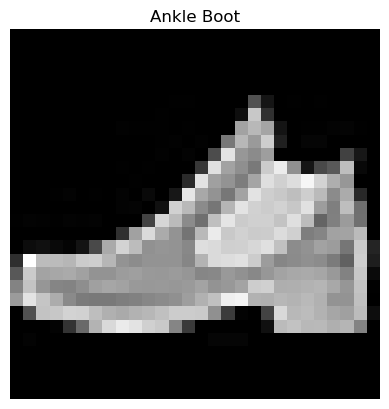

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[index].squeeze(), cmap = 'gray')
plt.title(classes[labels[index]])
plt.axis('off')
plt.show()
index += 1

# PCA step by step
Here is the short summary of the required steps:
* **Scale the data** — we don’t want some feature to be voted as “more important” due to scale differences. 10m = 10000mm, but the algorithm isn’t aware of meters and millimeters
* **Calculate covariance matrix** — square matrix giving the covariances between each pair of elements of a random vector
* **Eigen Decomposition**


# Scale the Data:
Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as: $$z = \frac{(x - u)}{s}$$
where $u$ is the mean of the training samples or zero if `with_mean=False`, and $s$ is the standard deviation of the training samples or one if `with_std=False`.

In [4]:
mean_ = data.mean(axis =0)
std_ = data.std(axis=0)

X_scaled = (data-mean_)/std_

# Calculate Covariance Matrix:
Let’s take a step back here and understand the difference between variance and covariance. Variance reports variation of a single random variable — let’s say the weight of a person, and covariance reports how much two random variables vary — like weight and height of a person.
On the diagonal of the covariance matrix we have variances, and other elements are the covariances.

In [5]:
print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')
cov_matrix = np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
print('\nSneak Peak of the covariance matrix:\n')
cov_matrix[0:5, 0:5]

Shape of X_scaled: (30000, 784)
Shape of features: (784, 30000)
Shape of cov_matrix: (784, 784)

Sneak Peak of the covariance matrix:



array([[1.00003333, 0.10344873, 0.02532451, 0.02635544, 0.0259777 ],
       [0.10344873, 1.00003333, 0.67948885, 0.16289888, 0.05367159],
       [0.02532451, 0.67948885, 1.00003333, 0.29368204, 0.0353962 ],
       [0.02635544, 0.16289888, 0.29368204, 1.00003333, 0.55370309],
       [0.0259777 , 0.05367159, 0.0353962 , 0.55370309, 1.00003333]])

As you can see, the diagonal elements are identical, and the matrix is symmetrical. Up next, eigendecomposition.

# Eigendecomposition
`Eigendecomposition is a process that decomposes a square matrix into eigenvectors and eigenvalues.` <font color='red'>Eigenvectors are simple unit vectors</font>, and <font color='green'>eigenvalues are coefficients which give the magnitude to the eigenvectors. </font>

We know so far that our `covariance matrix is symmetrical.` As it turns out, `eigenvectors of symmetric matrices are orthogonal.` For PCA this means that we have the first principal component which explains most of the variance. Orthogonal to that is the second principal component, which explains most of the remaining variance. This is repeated for N number of principal components, where N equals to number of original features.

And this turns out to be neat for us — principal components are sorted by percentage of variance explained, as we can decide how many should we keep. For example, if we have 100 features originally, but the first 3 principal components explain 95% of the variance, then it makes sense to keep only these 3 for visualizations and model training.


In [6]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)



print(f'First 10 eigenvalues: {eig_values[:10]}')
print(f'\n\nLast 10 eigenvalues: {eig_values[-10:]}')

First 10 eigenvalues: [153.06599858 134.58513832  53.62624634  45.83523074  35.94793614
  27.1722212   16.16894956  11.26325146   9.89960743   8.76881916]


Last 10 eigenvalues: [0.03099301 0.02958344 0.03047201 0.03232823 0.03207515 0.03185936
 0.03218829 0.02955674 0.03128741 0.03836895]


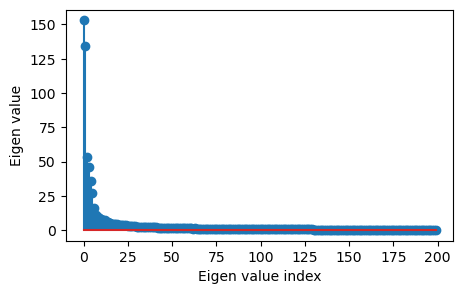

In [7]:
plt.figure(figsize=(5,3))
plt.stem(eig_values[:200])
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [8]:
for i in range(200):
    exp_var = np.sum(eig_values[:i+1])*100 / np.sum(eig_values)
    print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')

Eigenvectors upto 1 expresses 19.5230735181995 % variance
Eigenvectors upto 2 expresses 36.68897302741586 % variance
Eigenvectors upto 3 expresses 43.52882746554151 % variance
Eigenvectors upto 4 expresses 49.37496303896835 % variance
Eigenvectors upto 5 expresses 53.96000613539757 % variance
Eigenvectors upto 6 expresses 57.42573514793009 % variance
Eigenvectors upto 7 expresses 59.48803241770392 % variance
Eigenvectors upto 8 expresses 60.92462374642834 % variance
Eigenvectors upto 9 expresses 62.18728668600386 % variance
Eigenvectors upto 10 expresses 63.305721235345835 % variance
Eigenvectors upto 11 expresses 64.34015921745102 % variance
Eigenvectors upto 12 expresses 65.30345377006299 % variance
Eigenvectors upto 13 expresses 66.22157672421167 % variance
Eigenvectors upto 14 expresses 66.99535115019918 % variance
Eigenvectors upto 15 expresses 67.74056613252274 % variance
Eigenvectors upto 16 expresses 68.43816735826337 % variance
Eigenvectors upto 17 expresses 69.06144815928644 

# Visualizations
## Eigenvector Visualization


In [9]:
X_scaled[0].reshape((-1, 784)).shape

(1, 784)

In [10]:
eig_vectors[:, 0].reshape((784, -1)).shape

(784, 1)

In [11]:
result = np.dot(X_scaled.reshape((-1, 784)), eig_vectors[:,:50].reshape((784, -1)))
result.shape

(30000, 50)

In [12]:
projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])
res2d = pd.DataFrame(projected_1, columns=['PC1'])
res2d['PC2'] = projected_2
res2d['Y'] = labels
res2d.head()

PC1        PC2  Y
0 -13.846035  -3.141500  9
1  13.780054   8.119654  0
2  -4.080987 -20.163169  5
3   4.344533   0.808241  8
4  21.412902  19.844596  0

## 2D Visualization

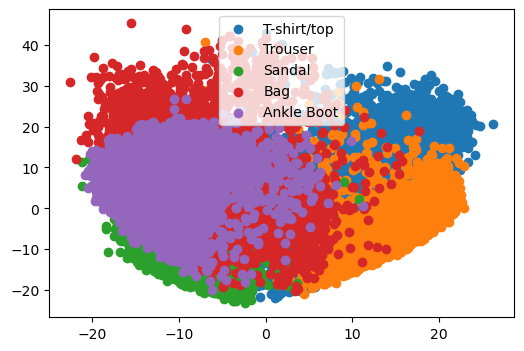

In [13]:
plt.figure(figsize=(6,4))
for label in selected_labels:
    label_name = classes[label]
    coords = res2d[res2d['Y']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    plt.scatter(x, y, label=label_name)

plt.legend()
plt.show()

## 3D Visualization

In [14]:
projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])
projected_3 = X_scaled.dot(eig_vectors.T[2])
res3d = pd.DataFrame(projected_1, columns=['PC1'])
res3d['PC2'] = projected_2
res3d['PC3'] = projected_3
res3d['Y'] = labels
res3d = res3d.head(500)

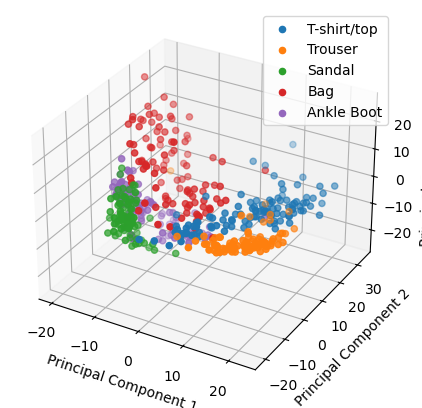

In [15]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

for label in selected_labels:
    label_name = classes[label]
    coords = res3d[res3d['Y']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    z = coords['PC3'].values
    ax.scatter3D(x, y, z, label=label_name)
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# Reconstruction from Principal Component
## Reduction/Compression Phase:

In [16]:
reduced_eigen_space = eig_vectors[:, :350]

In [17]:
print(f'Shape of X_scaled: {X_scaled.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
X_compressed = np.dot(X_scaled, reduced_eigen_space)
print(f'Shape of X_compressed: {X_compressed.shape}')

Shape of X_scaled: (30000, 784)
Shape of reduced_eigen_space: (784, 350)
Shape of X_compressed: (30000, 350)


In [18]:
print(f'Shape of X_compressed: {X_compressed.shape}')
print(f'Shape of reduced_eigen_space.T: {reduced_eigen_space.T.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
print(f'Shape of X_reconstructed: {X_reconstructed.shape}')

Shape of X_compressed: (30000, 350)
Shape of reduced_eigen_space.T: (350, 784)
Shape of reduced_eigen_space: (784, 350)
Shape of X_reconstructed: (30000, 784)


In [19]:
data_reconstructed = (X_reconstructed * std_ ) + mean_
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))

In [20]:
rec_index = 0

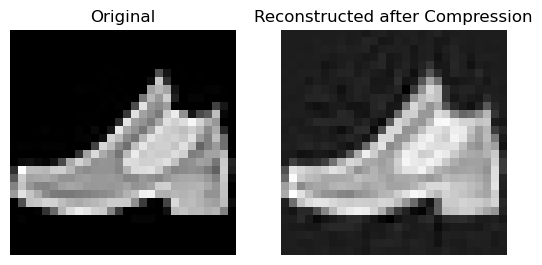

In [21]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(images[rec_index].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[rec_index].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)
rec_index +=1


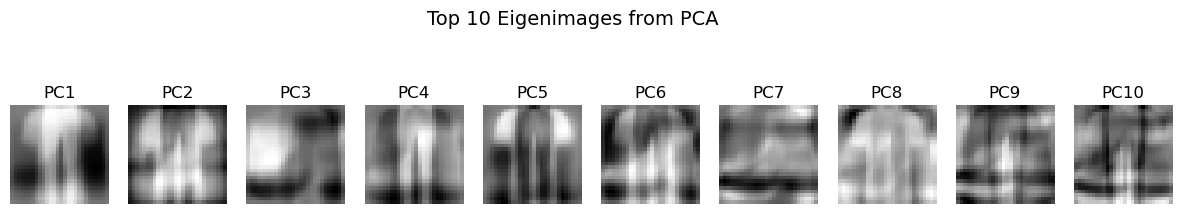

In [22]:
# Eigenimages Visualization

import matplotlib.pyplot as plt

num_eigenimages = 10

plt.figure(figsize=(15, 3))

for i in range(num_eigenimages):
    plt.subplot(1, num_eigenimages, i + 1)
    eigenimage = eig_vectors[:, i].reshape(28, 28)  
    plt.imshow(eigenimage, cmap='gray')
    plt.title(f"PC{i+1}")
    plt.axis('off')

plt.suptitle("Top 10 Eigenimages from PCA", fontsize=14)
plt.show()

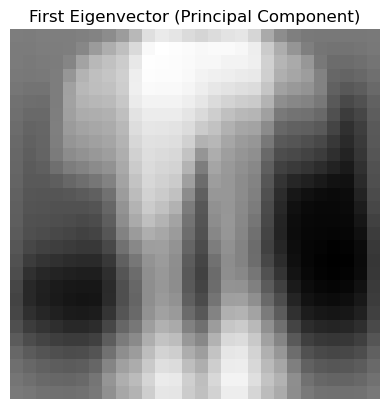

In [23]:
# Get the first eigenvector

first_eigenvector = eig_vectors[:, 0]

image = first_eigenvector.reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title("First Eigenvector (Principal Component)")
plt.axis('off')
plt.show()

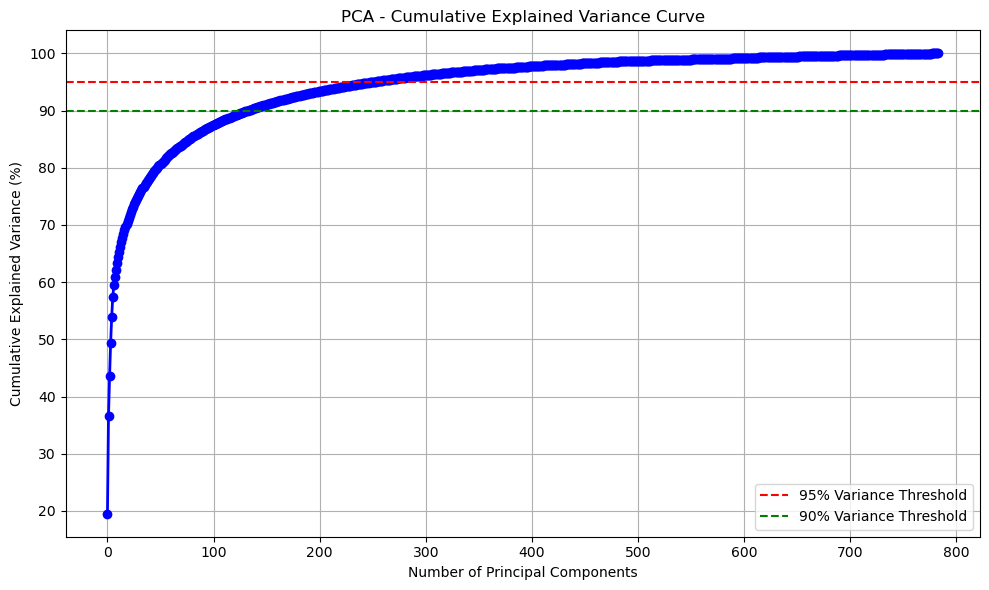

In [24]:
total_variance = np.sum(eig_values)

explained_variance_ratio = eig_values / total_variance

cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(len(cumulative_variance)), cumulative_variance * 100, 'b-o', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA - Cumulative Explained Variance Curve')
plt.axhline(y=95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axhline(y=90, color='g', linestyle='--', label='90% Variance Threshold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Key Observation from the Graph:

At the beginning (few principal components), the cumulative explained variance rises quickly. This indicates that the first few principal components capture a significant portion of the variance in the data.

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error

original_flat = images.reshape(images.shape[0], -1)             
reconstructed_flat = reconstructed_images.reshape(reconstructed_images.shape[0], -1)  


mse_per_image = np.mean((original_flat - reconstructed_flat) ** 2, axis=1)  

unique_labels = np.unique(labels)

per_class_mse = {}

for label in unique_labels:
    idxs = (labels == label)
    class_mse = mse_per_image[idxs]
    per_class_mse[label] = {
        'mean_mse': np.mean(class_mse),
        'std_mse': np.std(class_mse),
        'class_name': classes[label]
    }

print("Per-class Reconstruction MSE:")
for label in sorted(per_class_mse):
    info = per_class_mse[label]
    print(f"Class {info['class_name']} ({label}): Mean MSE = {info['mean_mse']:.4f}, Std = {info['std_mse']:.4f}")

Per-class Reconstruction MSE:
Class T-shirt/top (0): Mean MSE = 171.1275, Std = 132.4535
Class Trouser (1): Mean MSE = 80.3687, Std = 79.3867
Class Sandal (5): Mean MSE = 243.3482, Std = 124.6554
Class Bag (8): Mean MSE = 245.3464, Std = 147.5588
Class Ankle Boot (9): Mean MSE = 164.1274, Std = 84.4569


# Mean MSE:
1) Trouser (1) has the lowest Mean MSE (80.3687), suggesting it is the easiest class to reconstruct.
2) Sandal (5) and Bag (8) have the highest Mean MSEs (243.3482 and 245.3464, respectively), indicating they are the hardest classes to reconstruct.
# Standard Deviation (Std):
1) T-shirt/top (0) has a high Std (132.4535), indicating that some T-shirt/top images are reconstructed very well, while others are not.
2) Trouser (1) also has a relatively high Std (79.3867), but its Mean MSE is low, suggesting consistent good reconstruction overall.

# Why Do Some Classes Have Higher MSE?
1) Classes like Sandal (5) and Bag (8) might have more intricate shapes or textures, making them harder to capture with PCA.
2) Simple classes like Trouser (1) may have more uniform patterns, leading to better reconstruction.
3) PCA retains only the most significant principal components, which may not fully capture the variance in complex classes.
4) If fewer components are used, simpler classes (Trouser) might still be reconstructed well, while complex classes (Sandal, Bag) suffer more.
5) If images within a class vary widely (different angles, lighting, or styles), PCA might struggle to generalize and reconstruct them accurately.

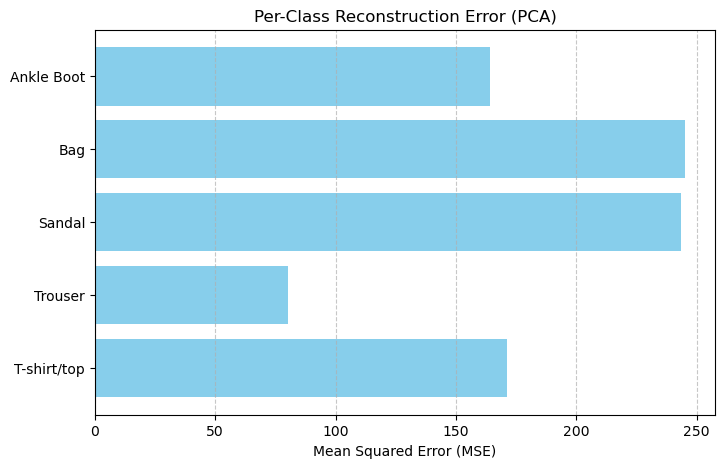

In [26]:
class_names = [per_class_mse[label]['class_name'] for label in sorted(per_class_mse)]
mse_values = [per_class_mse[label]['mean_mse'] for label in sorted(per_class_mse)]

plt.figure(figsize=(8, 5))
plt.barh(class_names, mse_values, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Per-Class Reconstruction Error (PCA)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

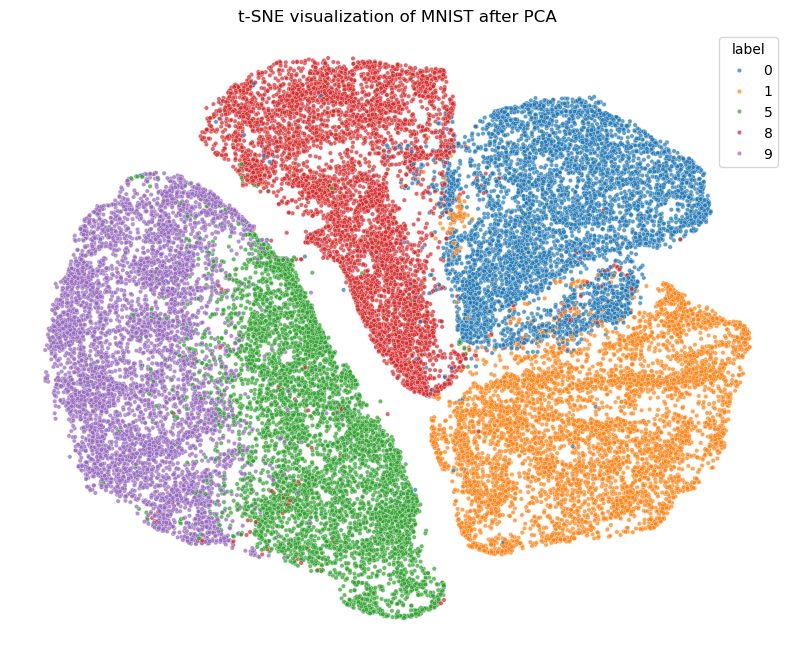

In [28]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA

# Apply PCA to reduce to 50 dimensions
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)  

# Apply t-SNE on PCA-reduced data
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_pca)  

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='tab10', s=10, alpha=0.7, legend='brief')
plt.title('t-SNE visualization of MNIST after PCA')
plt.axis('off')
plt.show()

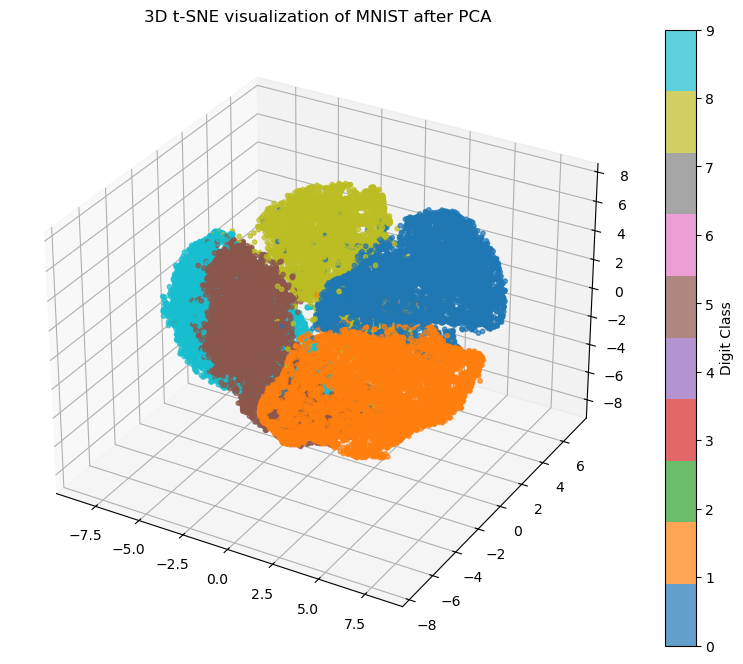

In [29]:
# Apply t-SNE with n_components=3
tsne_3d = TSNE(n_components=3, perplexity=30, n_iter=300, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_pca)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
                     c=labels, cmap='tab10', s=10, alpha=0.7)

plt.title('3D t-SNE visualization of MNIST after PCA')
plt.colorbar(scatter, label='Digit Class')
plt.show()

# Why Use t-SNE After PCA?
1) t-SNE is computationally expensive , especially on high-dimensional data.
2) If you run t-SNE directly on raw image data (MNIST: 28x28 = 784 dimensions), it will be very slow and may not converge well.
3) PCA reduces the dimensionality first , say to 30–50 features, which dramatically speeds up t-SNE.
4) High-dimensional data often contains redundant or noisy features .
5) PCA removes some of this noise by focusing on the directions of maximum variance .
6) This results in cleaner input for t-SNE , leading to better visualizations.
7) In high-dimensional space, distances between points become less meaningful — everything becomes equidistant.
8) t-SNE relies on computing pairwise similarities between points. It performs much better when those distances are meaningful.
9) PCA helps preserve global structure, while t-SNE captures local structure in lower dimensions.
10) Running t-SNE after PCA usually gives clearer clusters and less scattered embeddings than running t-SNE alone.

# Apply UMAP on PCA Output:

In [ ]:
!pip install umap-learn

In [30]:
from sklearn.decomposition import PCA

# Reduce to 50 PCA components for faster UMAP
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)  

In [31]:
import umap

# Apply UMAP on PCA-reduced data
reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42
)
X_umap = reducer.fit_transform(X_pca) 

2025-05-24 06:15:02.375255: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 06:15:03.120790: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 06:15:03.268702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-24 06:15:03.572501: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-24 06:15:03.618023: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-24 06:15:03.991327: I tensorflow/core/platform/cpu_feature_gu

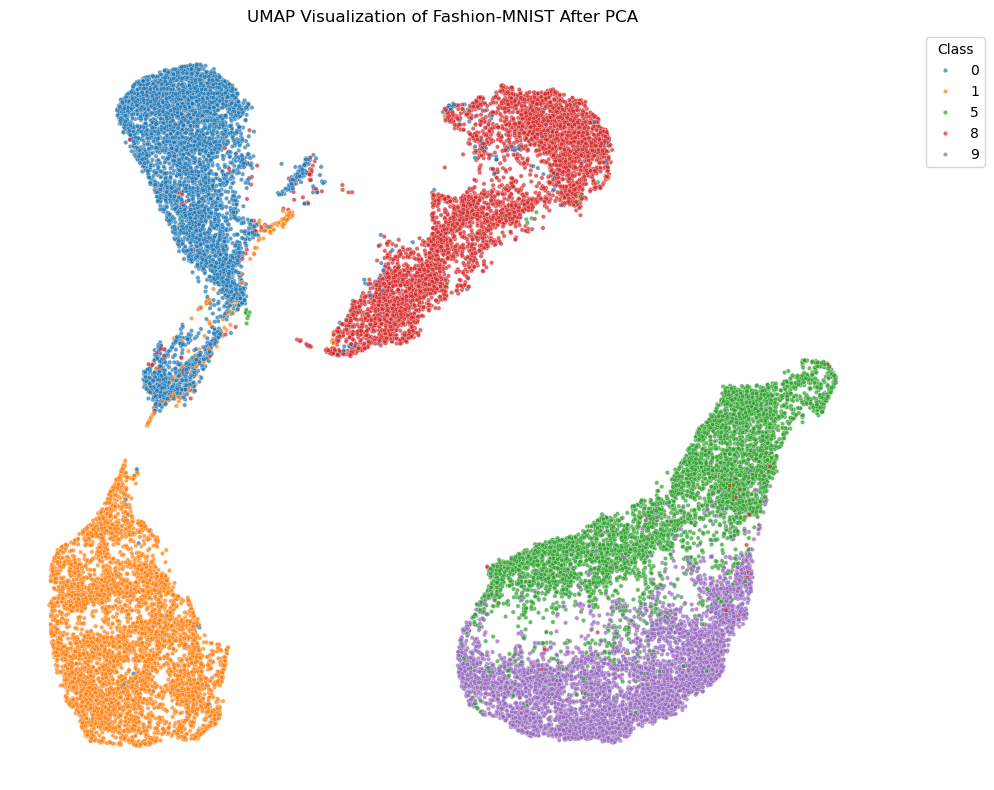

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x=X_umap[:, 0], y=X_umap[:, 1],
    hue=labels,
    palette='tab10',
    s=10,
    alpha=0.7,
    legend='brief'
)
plt.title('UMAP Visualization of Fashion-MNIST After PCA')
plt.axis('off')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

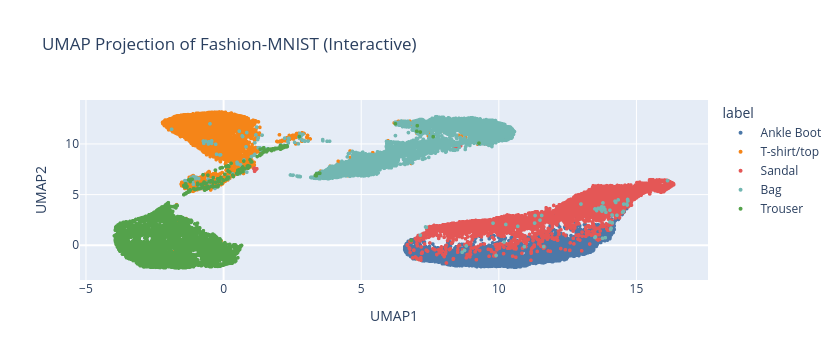

In [36]:
import plotly.express as px

df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['label'] = labels.map(classes)  

fig = px.scatter(df_umap, x='UMAP1', y='UMAP2', color='label', hover_data=['label'],
                 title='UMAP Projection of Fashion-MNIST (Interactive)',
                 color_discrete_sequence=px.colors.qualitative.T10)
fig.update_traces(marker=dict(size=4))
fig.show()

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

print("Cluster labels assigned:", np.unique(clusters))

Cluster labels assigned: [0 1 2 3 4]


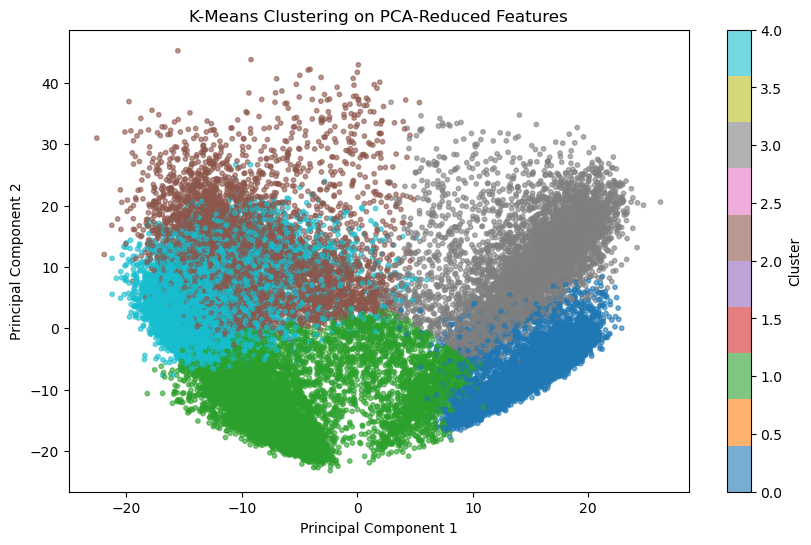

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=10, alpha=0.6)
plt.title('K-Means Clustering on PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [37]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(labels, clusters)
nmi = normalized_mutual_info_score(labels, clusters)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Info Score: {nmi:.4f}")

Adjusted Rand Index: 0.6546
Normalized Mutual Info Score: 0.6902


In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=50, kernel="rbf", gamma=0.001, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_scaled)

explained_variance = kpca.lambdas_ / np.sum(kpca.lambdas_)
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance explained by first 50 components:")
for i in range(10, 51, 10):
    print(f"First {i} components: {cumulative_variance[i-1]*100:.2f}%")

plt.figure(figsize=(8, 6))
for label in selected_labels:
    mask = (labels == label)
    plt.scatter(X_kpca[mask, 0], X_kpca[mask, 1], label=classes[label], alpha=0.6)
plt.title("2D Kernel PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for label in selected_labels:
    mask = (labels == label)
    ax.scatter(X_kpca[mask, 0], X_kpca[mask, 1], X_kpca[mask, 2], label=classes[label], alpha=0.6)
ax.set_title("3D Kernel PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.show()

# Reconstruct from Kernel PCA
X_reconstructed = kpca.inverse_transform(X_kpca)
data_reconstructed = scaler.inverse_transform(X_reconstructed)
reconstructed_images = data_reconstructed.reshape(-1, 28, 28)

# Show original vs reconstructed
index = 0
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(images[index], cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_images[index], cmap='gray')
plt.title("Reconstructed")
plt.axis("off")
plt.show()